In [1]:
%matplotlib inline

import re
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

plt.style.use('ggplot')
figsize(15,8)
pd.set_option('display.max_columns', None)


## 1. Importing Data 

In [2]:
path = "data/"

### 1.1 Extracting columns names

In [3]:
with open(path+"census_income_metadata.txt") as f:
    lines = f.readlines()
cols = []
for line in lines:
    if (re.search("[A-Za-z1-9]+:\s+[A-Za-z0-9]+",line) and re.search("^((?!(Terran|terran|ignore|93.80%)).)*$",line)):
        name = line.split(":")[0].replace(" ","_")
        cols.append(name)
cols.append("target")

In [4]:
lines

['| This data was extracted from the census bureau database found at\n',
 '| http://www.census.gov/ftp/pub/DES/www/welcome.html\n',
 '| Donor: Terran Lane and Ronny Kohavi\n',
 '|        Data Mining and Visualization\n',
 '|        Silicon Graphics.\n',
 '|        e-mail: terran@ecn.purdue.edu, ronnyk@sgi.com for questions.\n',
 '|\n',
 '| The data was split into train/test in approximately 2/3, 1/3\n',
 "| proportions using MineSet's MIndUtil mineset-to-mlc.\n",
 '|\n',
 '| Prediction task is to determine the income level for the person\n',
 '| represented by the record.  Incomes have been binned at the $50K\n',
 '| level to present a binary classification problem, much like the\n',
 '| original UCI/ADULT database.  The goal field of this data, however,\n',
 '| was drawn from the "total person income" field rather than the\n',
 '| "adjusted gross income" and may, therefore, behave differently than the\n',
 '| orginal ADULT goal field.\n',
 '|\n',
 '| More information detailing the mea

### 1.2 Reading train & test data and checking duplicates

In [5]:
train = pd.read_csv(path+"census_income_learn.csv", names = cols, header = None)
test = pd.read_csv(path+"census_income_test.csv", names = cols[1:], header = None)
print train.shape, test.shape
train.drop_duplicates(inplace = True)
test.drop_duplicates(inplace = True)
print train.shape, test.shape

(199523, 42) (99762, 41)
(196294, 42) (98446, 41)


In [6]:
train.head()

,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,race,hispanic_origin,sex,member_of_a_labor_union,reason_for_unemployment,full_or_part_time_employment_stat,capital_gains,capital_losses,dividends_from_stocks,tax_filer_stat,region_of_previous_residence,state_of_previous_residence,detailed_household_and_family_stat,detailed_household_summary_in_household,instance_weight,migration_code-change_in_msa,migration_code-change_in_reg,migration_code-move_within_reg,live_in_this_house_1_year_ago,migration_prev_res_in_sunbelt,num_persons_worked_for_employer,family_members_under_18,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veteran's_admin,veterans_benefits,weeks_worked_in_year,year,target
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,?,?,?,Not in universe under 1 year old,?,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,?,?,?,Not in universe under 1 year old,?,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [8]:
test.head()

,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,race,hispanic_origin,sex,member_of_a_labor_union,reason_for_unemployment,full_or_part_time_employment_stat,capital_gains,capital_losses,dividends_from_stocks,tax_filer_stat,region_of_previous_residence,state_of_previous_residence,detailed_household_and_family_stat,detailed_household_summary_in_household,instance_weight,migration_code-change_in_msa,migration_code-change_in_reg,migration_code-move_within_reg,live_in_this_house_1_year_ago,migration_prev_res_in_sunbelt,num_persons_worked_for_employer,family_members_under_18,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veteran's_admin,veterans_benefits,weeks_worked_in_year,year,target
38,Private,6,36,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,White,Mexican (Mexicano),Female,Not in universe,Not in universe,Full-time schedules,0,0,0,Joint one under 65 & one 65+,Not in universe,Not in universe,Spouse of householder,Spouse of householder,1032.38,?,?,?,Not in universe under 1 year old,?,4,Not in universe,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,12,95,- 50000.
44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,White,All other,Female,Not in universe,Not in universe,PT for econ reasons usually PT,0,0,2500,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,1462.33,?,?,?,Not in universe under 1 year old,?,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95,- 50000.
2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,Mexican-American,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1601.75,?,?,?,Not in universe under 1 year old,?,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
35,Private,29,3,High school graduate,0,Not in universe,Divorced,Transportation,Executive admin and managerial,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,Not in universe,Not in universe,Householder,Householder,1866.88,Nonmover,Nonmover,Nonmover,Yes,Not in universe,5,Not in universe,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,94,- 50000.
49,Private,4,34,High school graduate,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Full-time schedules,0,0,0,Single,Not in universe,Not in universe,Secondary individual,Nonrelative of householder,1394.54,?,?,?,Not in universe under 1 year old,?,4,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,50,95,- 50000.


## 2. Exploratory Data Analysis

### 2.1  Checking missing values

In [7]:
train.isnull().sum()

age                                           0
class_of_worker                               0
detailed_industry_recode                      0
detailed_occupation_recode                    0
education                                     0
wage_per_hour                                 0
enroll_in_edu_inst_last_wk                    0
marital_stat                                  0
major_industry_code                           0
major_occupation_code                         0
race                                          0
hispanic_origin                               0
sex                                           0
member_of_a_labor_union                       0
reason_for_unemployment                       0
full_or_part_time_employment_stat             0
capital_gains                                 0
capital_losses                                0
dividends_from_stocks                         0
tax_filer_stat                                0
region_of_previous_residence            

In [10]:
test.isnull().sum()

class_of_worker                               0
detailed_industry_recode                      0
detailed_occupation_recode                    0
education                                     0
wage_per_hour                                 0
enroll_in_edu_inst_last_wk                    0
marital_stat                                  0
major_industry_code                           0
major_occupation_code                         0
race                                          0
hispanic_origin                               0
sex                                           0
member_of_a_labor_union                       0
reason_for_unemployment                       0
full_or_part_time_employment_stat             0
capital_gains                                 0
capital_losses                                0
dividends_from_stocks                         0
tax_filer_stat                                0
region_of_previous_residence                  0
state_of_previous_residence             

### 2.2 Checking and converting column data types

In [8]:
train.dtypes

age                                             int64
class_of_worker                                object
detailed_industry_recode                        int64
detailed_occupation_recode                      int64
education                                      object
wage_per_hour                                   int64
enroll_in_edu_inst_last_wk                     object
marital_stat                                   object
major_industry_code                            object
major_occupation_code                          object
race                                           object
hispanic_origin                                object
sex                                            object
member_of_a_labor_union                        object
reason_for_unemployment                        object
full_or_part_time_employment_stat              object
capital_gains                                   int64
capital_losses                                  int64
dividends_from_stocks       

In [9]:
convert_cols_obj = ['detailed_industry_recode',
                    'detailed_occupation_recode',
                    'own_business_or_self_employed',
                    'veterans_benefits']

train[convert_cols_obj] = train[convert_cols_obj].astype('object')
test[convert_cols_obj] = test[convert_cols_obj].astype('object')

### 2.3 Column summary statistics

#### 2.3.1 Numerical columns

In [10]:
train.describe()

,age,wage_per_hour,capital_gains,capital_losses,dividends_from_stocks,instance_weight,num_persons_worked_for_employer,weeks_worked_in_year,year
count,196294.000000,196294.000000,196294.000000,196294.000000,196294.000000,196294.000000,196294.000000,196294.000000,196294.000000
mean,34.929468,56.336505,441.870037,37.927593,200.722386,1743.267584,1.988105,23.553889,94.499328
std,22.210001,277.054333,4735.677027,274.081174,2000.130616,996.945985,2.371018,24.428588,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.000000,37.870000,0.000000,0.000000,94.000000
25%,16.000000,0.000000,0.000000,0.000000,0.000000,1061.530000,0.000000,0.000000,94.000000
50%,34.000000,0.000000,0.000000,0.000000,0.000000,1620.175000,1.000000,12.000000,94.000000
75%,50.000000,0.000000,0.000000,0.000000,0.000000,2194.060000,4.000000,52.000000,95.000000
max,90.000000,9999.000000,99999.000000,4608.000000,99999.000000,18656.300000,6.000000,52.000000,95.000000


##### 2.3.1.1 Checking outliers for capital_gains, capital_lossess, dividends_from_stocks & wage_per_hour

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E570400>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000001089C080>], dtype=object)

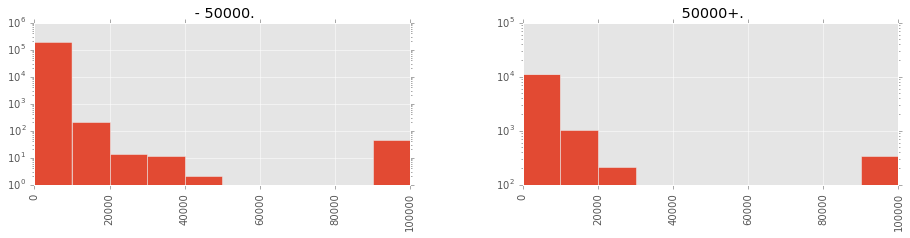

In [11]:
train.hist(column = 'capital_gains', by = 'target',log = True, figsize = (15,3))

In [12]:
train['capital_gains'][train['capital_gains']>40000].value_counts()

99999    390
41310      2
Name: capital_gains, dtype: int64

In [13]:
train['veterans_benefits'][train['capital_gains'] == 99999].value_counts()

2    387
1      3
Name: veterans_benefits, dtype: int64

It is strange that 390 people have values for capital_gains as 99999 but leaving it as it is since it might have some special significance.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000EDAB7F0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000F5ED908>], dtype=object)

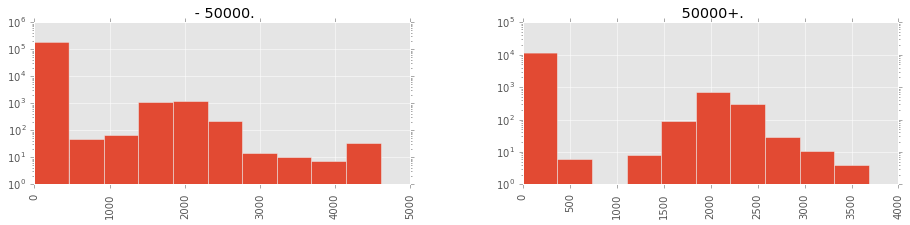

In [14]:
train.hist(column = 'capital_losses', by = 'target',log = True, figsize = (15,3))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000EC89710>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000EFCE4A8>], dtype=object)

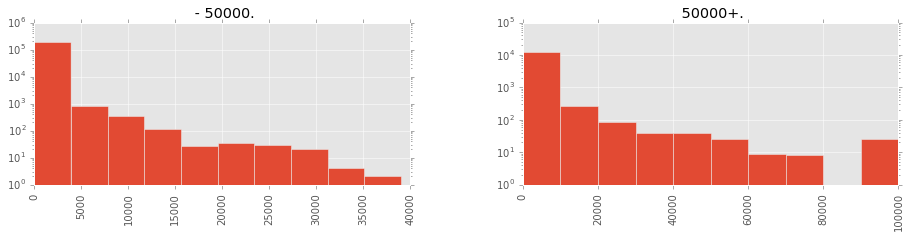

In [18]:
train.hist(column = 'dividends_from_stocks', by = 'target',log = True, figsize = (15,3))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F6096A0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000F290BE0>], dtype=object)

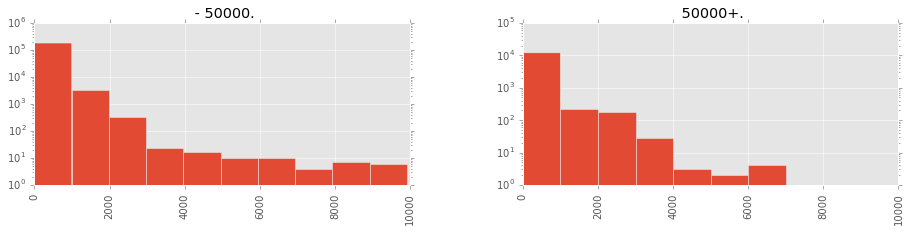

In [15]:
train.hist(column = 'wage_per_hour', by = 'target',log = True, figsize = (15,3))

In [16]:
train[train['wage_per_hour']>2000].head()

,age,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,wage_per_hour,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,race,hispanic_origin,sex,member_of_a_labor_union,reason_for_unemployment,full_or_part_time_employment_stat,capital_gains,capital_losses,dividends_from_stocks,tax_filer_stat,region_of_previous_residence,state_of_previous_residence,detailed_household_and_family_stat,detailed_household_summary_in_household,instance_weight,migration_code-change_in_msa,migration_code-change_in_reg,migration_code-move_within_reg,live_in_this_house_1_year_ago,migration_prev_res_in_sunbelt,num_persons_worked_for_employer,family_members_under_18,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veteran's_admin,veterans_benefits,weeks_worked_in_year,year,target
266,25,Private,42,13,Some college but no degree,2825,Not in universe,Never married,Medical except hospital,Technicians and related support,White,All other,Male,No,Not in universe,Children or Armed Forces,0,0,0,Single,Not in universe,Not in universe,Nonfamily householder,Householder,2691.02,Nonmover,Nonmover,Nonmover,Yes,Not in universe,6,Not in universe,United-States,Germany,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
330,29,Private,37,8,Bachelors degree(BA AB BS),5000,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,White,All other,Female,No,Not in universe,Full-time schedules,0,0,0,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,1502.35,?,?,?,Not in universe under 1 year old,?,6,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,- 50000.
1018,62,Private,3,39,High school graduate,2200,Not in universe,Married-civilian spouse present,Mining,Transportation and material moving,White,All other,Male,No,Not in universe,Full-time schedules,0,0,100,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,237.67,?,?,?,Not in universe under 1 year old,?,6,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,50000+.
1222,35,Private,33,35,Some college but no degree,8000,Not in universe,Married-civilian spouse present,Retail trade,Precision production craft & repair,White,All other,Male,No,Not in universe,Children or Armed Forces,0,0,0,Joint both under 65,Not in universe,Not in universe,Householder,Householder,2872.93,Nonmover,Nonmover,Nonmover,Yes,Not in universe,2,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2083,46,Federal government,4,6,Masters degree(MA MS MEng MEd MSW MBA),2751,Not in universe,Divorced,Construction,Professional specialty,White,All other,Male,No,Not in universe,PT for econ reasons usually PT,0,0,300,Head of household,Not in universe,Not in universe,Householder,Householder,328.11,?,?,?,Not in universe under 1 year old,?,6,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,50000+.


The values in the 'wage_per_hour' column seem too high and hence I'm ignoring the columns for the analysis and modeling.

#### 2.3.2  Categorical columns

In [17]:
train.describe(include = ['O'])

,class_of_worker,detailed_industry_recode,detailed_occupation_recode,education,enroll_in_edu_inst_last_wk,marital_stat,major_industry_code,major_occupation_code,race,hispanic_origin,sex,member_of_a_labor_union,reason_for_unemployment,full_or_part_time_employment_stat,tax_filer_stat,region_of_previous_residence,state_of_previous_residence,detailed_household_and_family_stat,detailed_household_summary_in_household,migration_code-change_in_msa,migration_code-change_in_reg,migration_code-move_within_reg,live_in_this_house_1_year_ago,migration_prev_res_in_sunbelt,family_members_under_18,country_of_birth_father,country_of_birth_mother,country_of_birth_self,citizenship,own_business_or_self_employed,fill_inc_questionnaire_for_veteran's_admin,veterans_benefits,target
count,196294,196294,196294,196294,196294,196294,196294,196294,196294,196294,196294,196294,196294,196294,196294,196294,196294,196294,196294,196294,196294,196294,196294,196294,196294,196294,196294,196294,196294,196294,196294,196294,196294
unique,9,52,47,17,3,7,24,15,5,10,2,3,6,8,6,6,51,38,8,10,9,10,3,4,5,43,43,43,5,3,3,3,2
top,Not in universe,0,0,High school graduate,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,Nonfiler,Not in universe,Not in universe,Householder,Householder,?,?,?,Not in universe under 1 year old,?,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,- 50000.
freq,97029,97467,97467,48374,183762,84194,97467,97467,164380,168803,102400,177232,190226,120632,71903,180562,180562,53242,75461,98015,98015,98015,99434,98015,144161,156037,157355,173783,173786,177445,194310,149976,183912


In [18]:
train['migration_code-change_in_msa'].value_counts()

 ?                   98015
 Nonmover            81128
 MSA to MSA          10572
 NonMSA to nonMSA     2802
 Not in universe      1419
 MSA to nonMSA         787
 NonMSA to MSA         615
 Abroad to MSA         453
 Not identifiable      430
 Abroad to nonMSA       73
Name: migration_code-change_in_msa, dtype: int64

In [19]:
train['migration_code-change_in_reg'].value_counts()

 ?                                 98015
 Nonmover                          81128
 Same county                        9779
 Different county same state        2792
 Not in universe                    1419
 Different region                   1178
 Different state same division       990
 Abroad                              530
 Different division same region      463
Name: migration_code-change_in_reg, dtype: int64

In [20]:
train['migration_code-move_within_reg'].value_counts()

 ?                               98015
 Nonmover                        81128
 Same county                      9779
 Different county same state      2792
 Not in universe                  1419
 Different state in South          972
 Different state in West           678
 Different state in Midwest        551
 Abroad                            530
 Different state in Northeast      430
Name: migration_code-move_within_reg, dtype: int64

### 2.4 Checking variation in target across years

In [21]:
pd.crosstab(train['target'],train['year'])

year,94,95
target,,
- 50000.,92440,91472
50000+.,5839,6543


### 2.5 Checking if categorical variables match in training and test set

In [22]:
columns = []
for column in train.columns.values:
    if train[column].dtypes == 'object':
        if train[column].unique().sort() != test[column].unique().sort():
            columns.append(column)

if columns == []:
    print "Categorical variables match in train and test sets."
else:
    print columns

Categorical variables match in train and test sets.


## 3. Preprocessing

### 3.1 Removing unwanted columns based on exploratory data analysis

In [23]:
remove_cols = ['age',
               'detailed_industry_recode',
               'detailed_occupation_recode',
               'instance_weight',
               'state_of_previous_residence',
               'detailed_household_and_family_stat',
               'migration_code-change_in_msa',
               'migration_code-change_in_reg',
               'migration_code-move_within_reg',
               'migration_prev_res_in_sunbelt',
               'wage_per_hour',
               'country_of_birth_self',
               'country_of_birth_father',
               'country_of_birth_mother',
               'year']

train.drop(remove_cols, axis = 1, inplace = True)
test.drop(remove_cols[1:], axis = 1, inplace = True)

In [24]:
print train.shape
print test.shape

(196294, 27)
(98446, 27)


### 3.2 Preparing data for modeling

In [25]:
from sklearn.preprocessing import LabelEncoder
target = 'target'
continous_feat = [col for col in train.columns.values if train[col].dtype == 'int64' or  train[col].dtype == 'float64']
categorical_feat = [col for col in train.columns.values if train[col].dtype == "object" and col != 'target']

flf = LabelEncoder()
train[target] = flf.fit_transform(train[target])
test[target] = flf.fit_transform(test[target])

In [26]:
X_train = pd.concat([pd.get_dummies(train[categorical_feat]), train[continous_feat]], axis = 1)
X_test = pd.concat([pd.get_dummies(test[categorical_feat]), test[continous_feat]], axis = 1)
y_train = train[target]
y_test = test[target]

## 4. Modeling

In [27]:
from sklearn.cross_validation import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc, roc_auc_score
from sklearn.grid_search import GridSearchCV

### 4.1 Functions

In [28]:
def plot_roc(false_positive_rate, true_positive_rate, auc):
    plt.title("ROC Curve")
    plt.plot(false_positive_rate, true_positive_rate, 'b', label = 'AUC = %f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
def liftchart(y, y_pred):
    df = pd.DataFrame({'y':y,'y_pred':y_pred})
    df.sort_values('y_pred',ascending = False, inplace = True)
    base = df['y'].sum()/float(len(y))
    lift_chart = []
    for i in range(1,11):
        n = i*len(y)/10
        sub = df.iloc[:n,:]
        lift_chart.append(sub['y'].sum()/float(n)/base)
     
    df_lift_chart = pd.DataFrame(lift_chart, index = np.linspace(0.1,1,10))
    return df_lift_chart

def precision_top_n(y,y_pred,n_list):
    correct = []
    df = pd.DataFrame({'y':y,'y_pred':y_pred})
    df.sort_values('y_pred',ascending = False, inplace = True)
    for n in n_list:
        sub = df.iloc[:n,:]
        correct.append(sub['y'].sum())

    precision = pd.DataFrame({'Count' : n_list, 'True' : correct})
    precision['Precision'] = precision['True']/precision['Count']*100
    return precision

### 4.2 Decision Tree Model

#### 4.2.1 Grid search to choose best decision tree hyper-parameters

In [29]:
glf = GridSearchCV(DecisionTreeClassifier(class_weight = 'balanced'),
                       param_grid = {'max_features': range(3,27),
                                     'max_depth' : range(5,20)},
                       scoring = 'roc_auc',
                       n_jobs = -1,
                       verbose = 1)
glf.fit(X_train,y_train)    

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  9.2min finished


Fitting 3 folds for each of 360 candidates, totalling 1080 fits


GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26], 'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=1)

In [30]:
print glf.best_params_, glf.best_score_
clf1 = glf.best_estimator_

{'max_features': 24, 'max_depth': 10} 0.905697630304


#### 4.2.2 Model Training - Decision Tree

In [31]:
clf1 = DecisionTreeClassifier(class_weight = 'balanced',random_state = 1000)
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1000,
            splitter='best')

#### 4.2.3 Model Predictions - Decision Tree

In [32]:
y_pred_class = clf1.predict(X_test)
y_pred_proba = clf1.predict_proba(X_test)[:,1]

#### 4.2.3 Model Performance - Decision Tree

Baseline Accuracy (If we only predict majority class)

In [33]:
accuracy_score(y_test, np.zeros_like(y_test))

0.93717367897121262

Accuracy - Test Set

In [34]:
accuracy_score(y_test, y_pred_class)

0.92169311094407091

AUC - Cross-validated

In [35]:
stratification = StratifiedKFold(y_train,n_folds = 5)
scores = cross_val_score(clf1, X_train, y_train, scoring = 'roc_auc', cv = stratification, n_jobs = -1)
print np.mean(scores), np.std(scores)

0.71267964483 0.00486704352577


AUC - Test Set

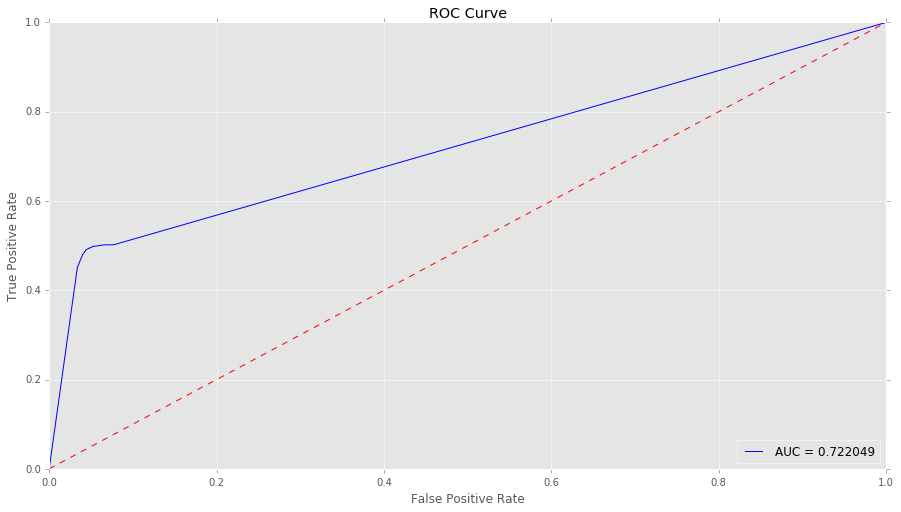

In [36]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc(false_positive_rate, true_positive_rate, roc_auc)

### 4.3 Random Forest Model

#### 4.3.1 Model Training

In [37]:
clf2 = RandomForestClassifier(n_estimators = 100, class_weight = 'balanced', n_jobs = -1, random_state = 1000)
clf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=1000, verbose=0,
            warm_start=False)

#### 4.3.2 Making Predictions

In [38]:
y_pred_class = clf2.predict(X_test)
y_pred_proba = clf2.predict_proba(X_test)[:,1]

#### 4.3.3 Model Performance

Baseline Accuracy (If we only predict majority class)

In [39]:
accuracy_score(y_test, np.zeros_like(y_test))

0.93717367897121262

Confusion Matrix

In [40]:
confusion_matrix(y_test, y_pred_class)

array([[90363,  1898],
       [ 3555,  2630]])

Accuracy - Test Set

In [41]:
accuracy_score(y_test, y_pred_class)

0.94460922739369801

Classification Report - Test Set

In [42]:
print classification_report(y_test, y_pred_class)

             precision    recall  f1-score   support

          0       0.96      0.98      0.97     92261
          1       0.58      0.43      0.49      6185

avg / total       0.94      0.94      0.94     98446



AUC - Cross-validated

In [43]:
stratification = StratifiedKFold(y_train,n_folds = 5)
scores = cross_val_score(clf2, X_train, y_train, scoring = 'roc_auc', cv = stratification, n_jobs = -1)
print np.mean(scores), np.std(scores)

0.919197433691 0.00419371147155


AUC - Test Set

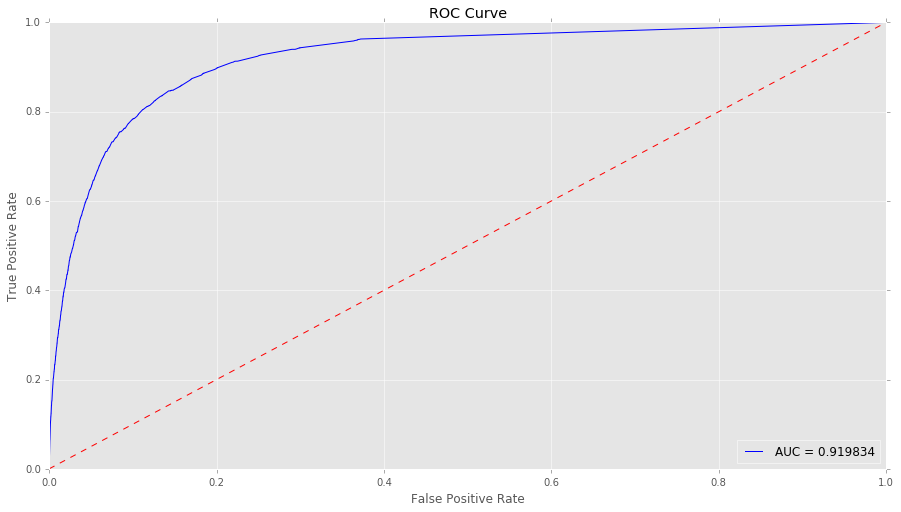

In [44]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc(false_positive_rate, true_positive_rate, roc_auc)

Lift Chart - Test Set

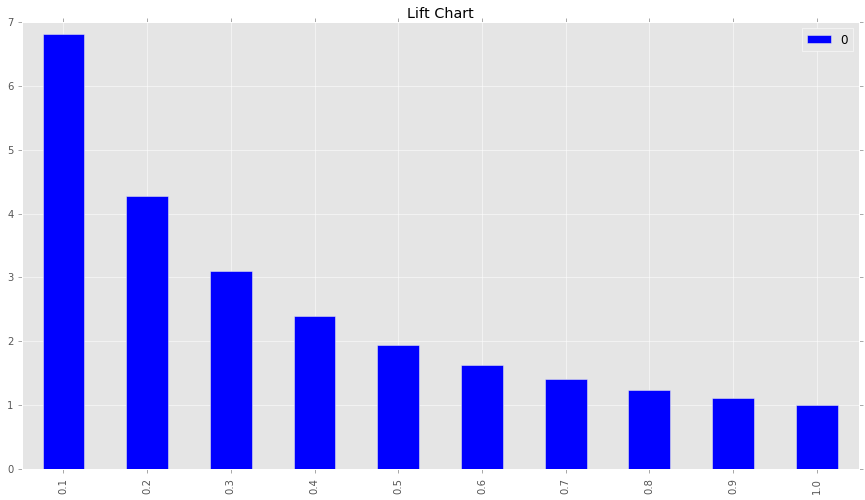

In [45]:
liftchart(y_test,y_pred_proba).plot(kind = 'bar')
plt.title("Lift Chart")

Top N Precision

In [46]:
breaks = [10,50,100,500,1000,5000,7000,10000,50000,len(y_test)]
precision_top_n(y_test,y_pred_proba,breaks)

,Count,True,Precision
0,10,6,60.000000
1,50,43,86.000000
2,100,83,83.000000
3,500,413,82.600000
4,1000,783,78.300000
5,5000,2832,56.640000
6,7000,3498,49.971429
7,10000,4262,42.620000
8,50000,5999,11.998000
9,98446,6185,6.282632


#### 4.3.4 Feature Importance

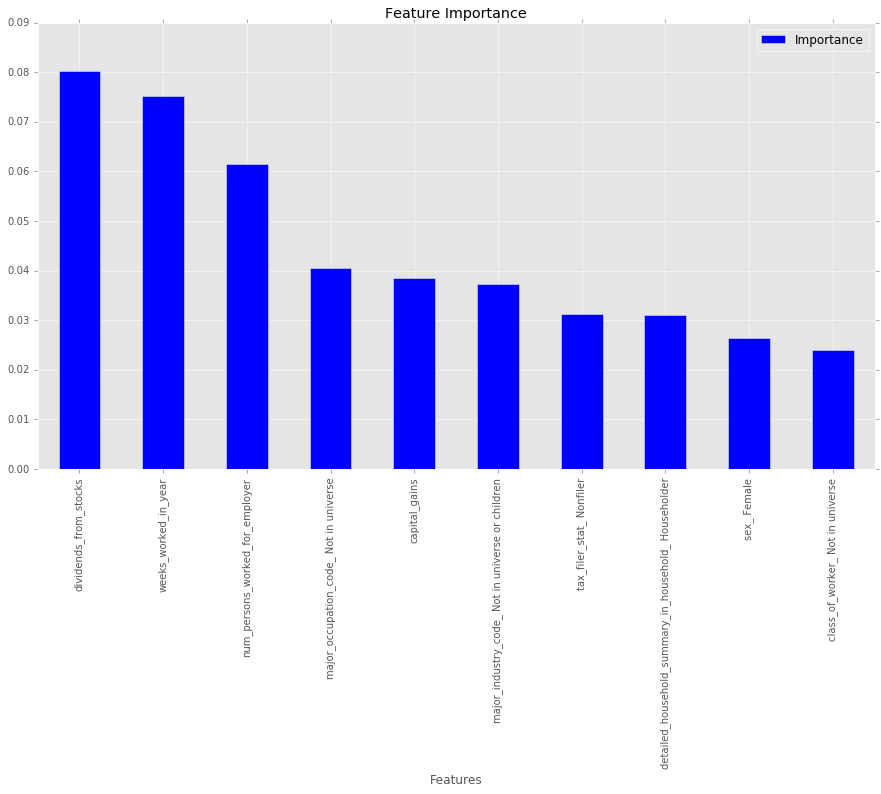

In [48]:
features = X_train.columns.values
pd.DataFrame({'Features':features,'Importance':clf2.feature_importances_}).sort_values(
by = 'Importance',ascending = False).head(10).set_index("Features").plot(kind = "bar")
plt.title("Feature Importance")

In [51]:
pd.DataFrame({'Features':features,'Importance':clf2.feature_importances_}).sort_values(
by = 'Importance',ascending = False).head(20).set_index("Features")

,Importance
Features,
dividends_from_stocks,0.080196
weeks_worked_in_year,0.075135
num_persons_worked_for_employer,0.061586
major_occupation_code_ Not in universe,0.040559
capital_gains,0.038525
major_industry_code_ Not in universe or children,0.037404
tax_filer_stat_ Nonfiler,0.031271
detailed_household_summary_in_household_ Householder,0.031056
sex_ Female,0.026377


#### 4.3.5 Checking correlations if they match feature importance

In [55]:
cor = pd.concat([X_train,y_train],axis = 1).corr()['target'] 

##### 4.3.5.1 Features positively correlated to target

In [74]:
cor[cor > 0.1].sort_values(ascending = False)

target                                                    1.000000
weeks_worked_in_year                                      0.260398
major_occupation_code_ Executive admin and managerial     0.240754
capital_gains                                             0.240481
num_persons_worked_for_employer                           0.220579
major_occupation_code_ Professional specialty             0.211772
detailed_household_summary_in_household_ Householder      0.210693
tax_filer_stat_ Joint both under 65                       0.203191
education_ Masters degree(MA MS MEng MEd MSW MBA)         0.189802
education_ Prof school degree (MD DDS DVM LLB JD)         0.188529
education_ Bachelors degree(BA AB BS)                     0.185010
marital_stat_ Married-civilian spouse present             0.181607
dividends_from_stocks                                     0.175486
sex_ Male                                                 0.159256
family_members_under_18_ Not in universe                  0.15

##### 4.3.5.2 Features negatively correlated to target

In [76]:
cor[cor < -0.1].sort_values()

major_industry_code_ Not in universe or children                        -0.219708
major_occupation_code_ Not in universe                                  -0.219708
class_of_worker_ Not in universe                                        -0.218643
tax_filer_stat_ Nonfiler                                                -0.195751
marital_stat_ Never married                                             -0.175415
sex_ Female                                                             -0.159256
detailed_household_summary_in_household_ Child under 18 never married   -0.146135
education_ Children                                                     -0.140177
veterans_benefits_0                                                     -0.140150
family_members_under_18_ Both parents present                           -0.123081
Name: target, dtype: float64

Most of the highly correlated features appear in the feature importance diagram.

## 5. Notes

1. The biggest challenge was the lack of context about the data. While the metadata text file did provide some context, having some more insights about the different variables would have been helpful.

2. I chose to experiment with tree-based models since they would choose the most important variables from all the input feature. The fact that there were many categorical variables and we don't have to worry about correlations, made tree-based models favorable.

3. Apart from converting the categorical features to binary, I did not perform much feature engineering since a simple random forest model using existing features was giving a good performance based on cross-validation on the training set and predictions on the test set. There is definitely scope to derive new features from existing features.

4. The random forest feature importance gives us an indication of the features that were the most important in developing the model in terms of the average decrease in gini. There is definitely scope in making the model more interpretable by getting the most important features that influenced the predictions of every point in the test set using techniques such as LIME (Local Interpretable Model-Agnostic Explanations) and other decision tree interpreters.